# **Name: Anushree Bharat Salunke**
# **Div: C**
# **Roll No: 19**
# **Moodle ID: 20102179**
# **Subject: DL**
# **Experiment Number: 7**
# **Aim:** To implement Data Augmentation and CNN using keras

In [ ]:
import os
directory = 'preview'
if not os.path.exists(directory):
  os.makedirs(directory)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
img = load_img('/content/drive/MyDrive/DL/cat.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)

In [ ]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
print(tf.__version__)


2.15.0


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0


In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
import keras
from keras.layers import Conv2D, Flatten, Dense
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


<ipython-input-14-8f5d341bee9a>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
  model = keras.Sequential([
      Conv2D(
          filters=hp.Int('conv_1_filter', min_value=32, max_value=128),
          kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
          activation='relu',
          input_shape=(28, 28, 1)
          ),
      Conv2D(
          filters=hp.Int('conv_2_filter', min_value=32, max_value=64),
          kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
          activation='relu'
          ),
      Flatten(),
      Dense(
          units=hp.Int('dense_1_units', min_value=32, max_value=128),
          activation='relu'
          ),
      Dense(10, activation='softmax')
      ])
  model.compile(
      optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
      )
  return model

In [ ]:
tuner_search = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=5,
directory='output',
project_name='fashion_mnist'
)


In [ ]:
tuner_search.search(train_images, train_labels, epochs=3, validation_split=0.1)

Trial 5 Complete [00h 00m 30s]
val_accuracy: 0.8681666851043701

Best val_accuracy So Far: 0.909166693687439
Total elapsed time: 00h 02m 54s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 90)        900       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 42)        94542     
                                                                 
 flatten (Flatten)           (None, 20328)             0         
                                                                 
 dense (Dense)               (None, 59)                1199411   
                                                                 
 dense_1 (Dense)             (None, 10)                600       
                                                                 
Total params: 1295453 (4.94 MB)
Trainable params: 1295453 (4.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1430 - accuracy: 0.9468 - val_loss: 0.3016 - val_accuracy: 0.9003
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1058 - accuracy: 0.9611 - val_loss: 0.2979 - val_accuracy: 0.9118
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0773 - accuracy: 0.9716 - val_loss: 0.3351 - val_accuracy: 0.9092
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0546 - accuracy: 0.9792 - val_loss: 0.3678 - val_accuracy: 0.9128
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0448 - accuracy: 0.9838 - val_loss: 0.4055 - val_accuracy: 0.9105
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0349 - accuracy: 0.9872 - val_loss: 0.4497 - val_accuracy: 0.9120
Epoch 7/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0268 - accuracy: 0.9899 - val_loss: 0.5355 - val_accuracy

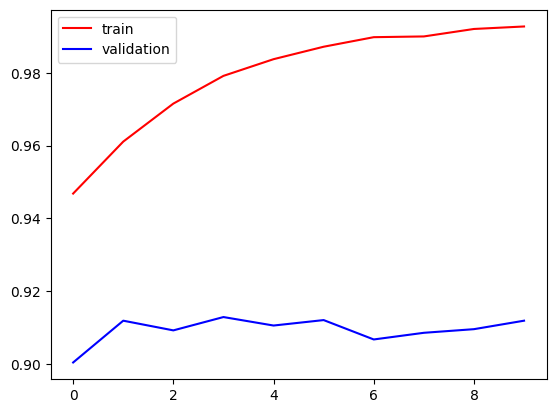

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#try to decrease the gap to reduce overfitting

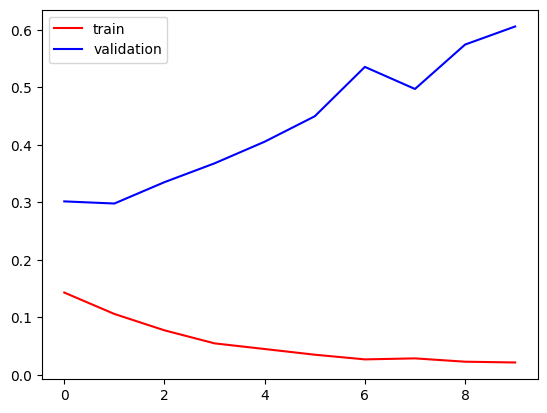

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#try to decrease the gap to reduce overfitting

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img1 = cv2.imread('/content/drive/MyDrive/DL/Cute-Dog-Images.jpg')

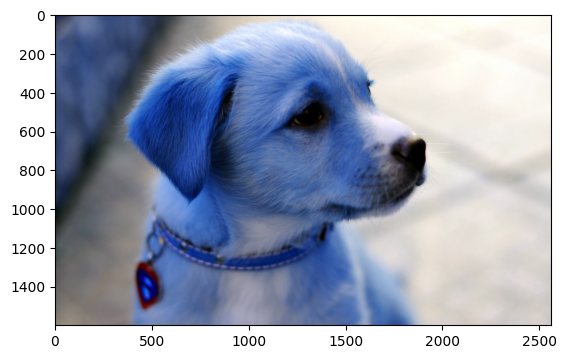

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape #actual shape of the image

(1600, 2560, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(28,28))

In [ ]:
test_input1 = test_img1.reshape((1,28,28,3)) #in this batch there is only one image